In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv("/content/zoo.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
high_level_class_column = df.iloc[:, -1]

unique_classes = high_level_class_column.nunique()
print(f'Number of unique high-level classes: {unique_classes}')

Number of unique high-level classes: 7


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


In [ ]:
features = df.iloc[:, 1:17]

agg_clustering = AgglomerativeClustering(n_clusters=7)

df['cluster'] = agg_clustering.fit_predict(features)

print(df[['cluster']].head())


   cluster
0        1
1        1
2        2
3        1
4        1


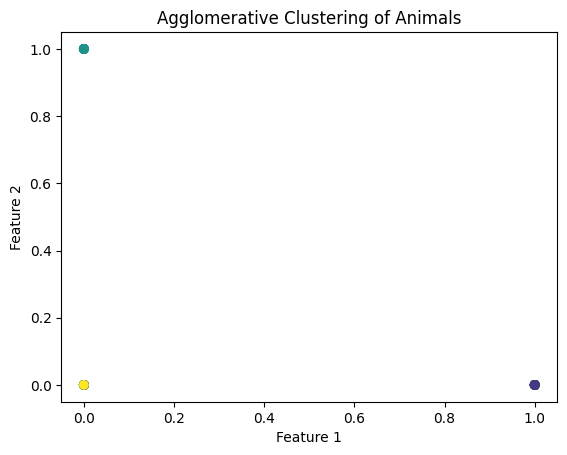

In [ ]:
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Agglomerative Clustering of Animals')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Agglomerative Clustering in Detail
Agglomerative Clustering is a type of hierarchical clustering, which is an unsupervised machine learning algorithm used to group similar data points into clusters. It is a bottom-up approach, meaning that it starts with each data point as its own cluster and progressively merges the closest clusters based on some similarity measure until the desired number of clusters is reached.

Key Concepts in Agglomerative Clustering:
Bottom-Up Hierarchical Clustering: Agglomerative clustering is a "bottom-up" approach. Initially, each point is considered a single cluster. Then, it iteratively merges the closest clusters together, step by step, until a stopping condition (such as the number of clusters) is met.

Linkage Criteria: When combining clusters, agglomerative clustering uses a criterion to determine which clusters should be merged. There are several linkage methods to choose from:

Single linkage: The shortest distance between points in different clusters (i.e., the minimum distance between any two points in the two clusters).
Complete linkage: The largest distance between points in different clusters (i.e., the maximum distance between any two points in the two clusters).
Average linkage: The average distance between all pairs of points in the two clusters.
Ward linkage: Minimizes the variance of merged clusters. This method is often preferred as it tends to create balanced clusters.
Dendrogram: A dendrogram is a tree-like diagram that shows the arrangement of the clusters. The vertical axis of the dendrogram represents the distance between clusters. As you move up the tree, clusters are merged until you end with one big cluster that contains all the data points.

Stopping Criterion: You can stop the algorithm when you have a predefined number of clusters or based on some other criteria, like a distance threshold between clusters.

Agglomerative Clustering Workflow:
Start with individual points as clusters.
Compute the distance matrix between all pairs of data points.
Merge the two closest clusters (using the chosen linkage criterion).
Repeat the process: At each step, recalculate the distance between the new cluster and the remaining clusters.
Stop when the desired number of clusters is achieved or when the clusters are sufficiently distinct.

In [ ]:
from sklearn.metrics import mean_squared_error


features = df.iloc[:, 1:17]

agg_clustering = AgglomerativeClustering(n_clusters=7)
df['Predicted_Class'] = agg_clustering.fit_predict(features)


actual_class = df.iloc[:, -1]

actual_class_numeric = pd.factorize(actual_class)[0]
predicted_class_numeric = df['Predicted_Class']

mse = mean_squared_error(actual_class_numeric, predicted_class_numeric)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.772277227722772


The Mean Squared Error (MSE) is a commonly used metric for evaluating the accuracy of predictive models, particularly for regression tasks. It measures the average of the squared differences between the actual values (true labels) and the predicted values.

